#Linear Regresssion Implementation

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Linear Regression model using Gradient Descent.

        Parameters:
        learning_rate (float): Learning rate for gradient descent.
        n_iterations (int): Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Train the Linear Regression model on the training data.

        Parameters:
        X (array-like): Feature matrix of shape (n_samples, n_features).
        y (array-like): Target vector of shape (n_samples,).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, 2 * (y_predicted - y))
            db = (1 / n_samples) * np.sum(2 * (y_predicted - y))

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict the target values for a given input.

        Parameters:
        X (array-like): Feature matrix of shape (n_samples, n_features).

        Returns:
        array-like: Predicted values.
        """
        return np.dot(X, self.weights) + self.bias


# Test the LinearRegression model on toy dataset

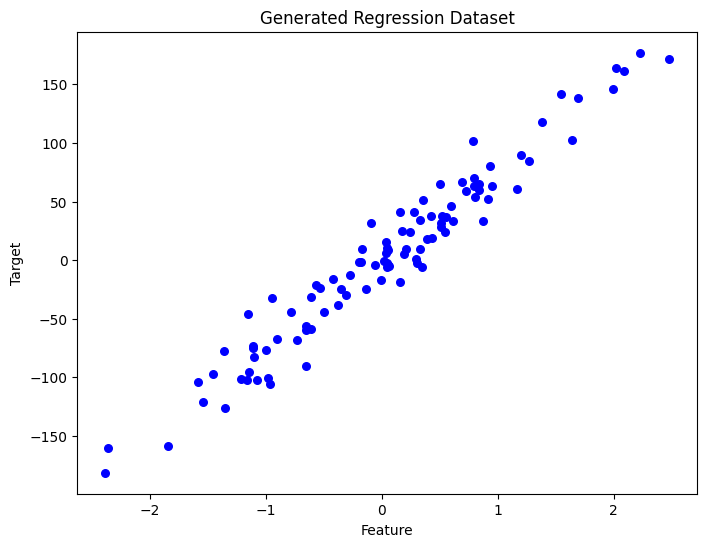

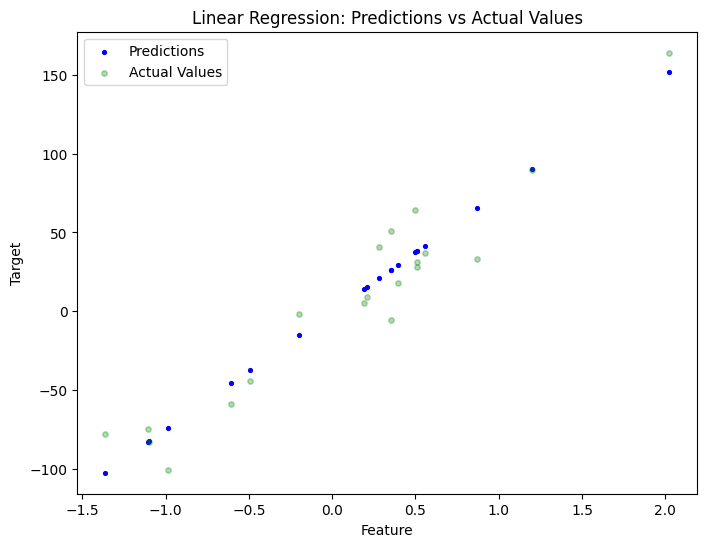

Mean Squared Error: 305.77


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.

    Parameters:
    y_true (array-like): True target values.
    y_pred (array-like): Predicted target values.

    Returns:
    float: Mean Squared Error.
    """
    return np.mean((y_true - y_pred) ** 2)

# Generate a synthetic regression dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.title('Generated Regression Dataset')
plt.scatter(X[:, 0], y, color='blue', marker='o', s=30)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

# Initialize and train the Linear Regression model
linear_regression_model = LinearRegression(learning_rate=0.01, n_iterations=1000)
linear_regression_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = linear_regression_model.predict(X_test)

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.title('Linear Regression: Predictions vs Actual Values')
plt.scatter(X_test[:, 0], y_pred, color='blue', marker='.', s=30, label='Predictions')
plt.scatter(X_test[:, 0], y_test, color='green', marker='o', s=15, alpha=0.3, label='Actual Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Calculate and print the Mean Squared Error
mse_value = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_value:.2f}")
